## WMM Laboratorium 1 Grupa 104
### Miłosz Andryszczuk
### Jakub Kwaśniak
---

In [124]:
import numpy as np
import matplotlib.pyplot as plt
from time import perf_counter

In [125]:
def getFreqSpectrum(signal_wave):
    return np.fft.fft(signal_wave) # computes dft


def getSpectrums(signal_wave, N_samples):
    freq_spectrum = getFreqSpectrum(signal_wave)  # frequency
    freq_spectrum[np.abs(freq_spectrum) < 1e-10] = 0  # remove small values
    magnitude_spectrum = np.abs(freq_spectrum) / N_samples # amplitude with normalization
    phase_spectrum = np.angle(freq_spectrum)  # phase
    phase_spectrum[np.abs(phase_spectrum) < 1e-10] = 0  # removes small values that are computation errors but have angels that can be mistaken as significant
    return freq_spectrum, magnitude_spectrum, phase_spectrum

### Zadanie 1

In [126]:
def getSampledSignal(period, N_samples):
    # time_linespace = set of sampling times
    time_linespace = np.linspace(0, period, N_samples, endpoint=False)
    signal_wave = np.cos(np.pi * time_linespace)
    return signal_wave, time_linespace


def ParsevalTheoremCheck(period, N_samples):
    # Verifies Parseval's Theorem
    signal, _ = getSampledSignal(period, N_samples)
    energy_time = np.sum(signal**2)  # Sum of squares in time domain
    fft = getFreqSpectrum(signal)
    energy_freq = np.sum(np.abs(fft)**2) / N_samples  # Sum of squares in frequency domain
    isParsevalValid = np.isclose(energy_time, energy_freq)
    return isParsevalValid, energy_time, energy_freq 


def plotDiagrams(period, N_samples):
    plt.figure(figsize=(10, 8))
    plotSignal(period, N_samples)
    plotSpectrums(period, N_samples)
    plt.tight_layout()
    plt.show()


def plotSignal(period, N_samples):
    signal, time_linespace = getSampledSignal(period, N_samples)
    plt.subplot(3, 1, 1)
    plt.stem(time_linespace, signal)
    plt.plot(time_linespace, signal)
    plt.grid(True)
    plt.title('Sampled signal waveform', fontsize=15)
    plt.xlabel('Time', fontsize=10)
    plt.ylabel('Amplitude', fontsize=10)


def plotSpectrums(period, N_samples):
    signal, time_linespace = getSampledSignal(period, N_samples)
    freq_spectrum, magnitude_spectrum, phase_spectrum = getSpectrums(signal, N_samples)
    
    time_linespace = np.linspace(0, period, N_samples, endpoint=False)
    # N_samples / period is sampling freq
    plt.subplot(3, 1, 2)
    plt.stem((N_samples / period) * time_linespace, magnitude_spectrum)
    plt.grid(True)
    plt.title('Magnitude Spectrum', fontsize=15)
    plt.xlabel('N', fontsize=10)
    plt.ylabel('Magnitude', fontsize=10)

    plt.subplot(3, 1, 3)
    plt.stem((N_samples / period) * time_linespace, phase_spectrum)
    plt.grid(True)
    plt.title('Phase Spectrum', fontsize=15)
    plt.xlabel('N', fontsize=10)
    plt.ylabel('Phase', fontsize=10)


def calc_fft_computation_period(period, max_sampling_exponent):
    samples = [2**n for n in range(1, max_sampling_exponent + 1)]
    data = {}
    for sample in samples:
        temp_times = []
        signal, _ = getSampledSignal(period, sample)
        for _ in range(100):
            start = perf_counter()
            np.fft.fft(signal)            
            stop = perf_counter()
            time_stamp = stop - start
            temp_times.append(time_stamp)
        data[sample] = np.mean(temp_times)

    plt.figure(figsize=(12, 8))
    plt.plot(data.keys(), data.values())
    plt.xlim(0, 2**max_sampling_exponent)
    plt.title('FFT computational complexity', fontsize=15)
    plt.xlabel('N', fontsize=10)
    plt.ylabel('Computation Time', fontsize=10)
    plt.grid(True)
    plt.show()

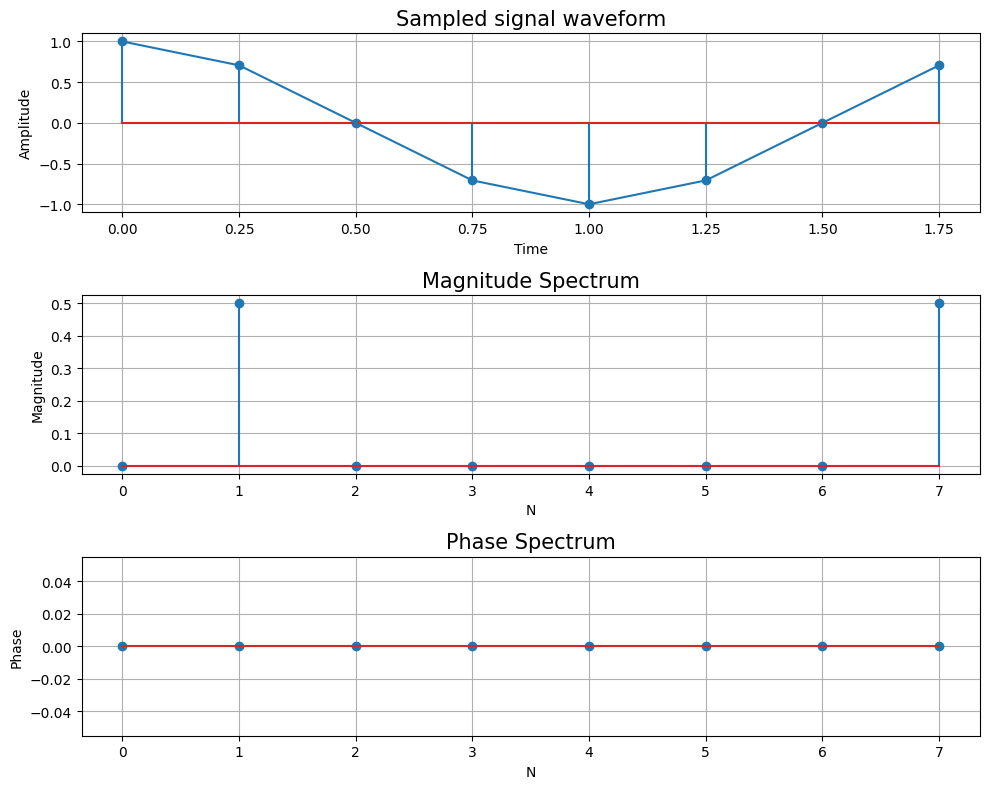

Parseval's Theorem is: Valid
Energy in time domain: 4.000
Energy in frequency domain: 4.000


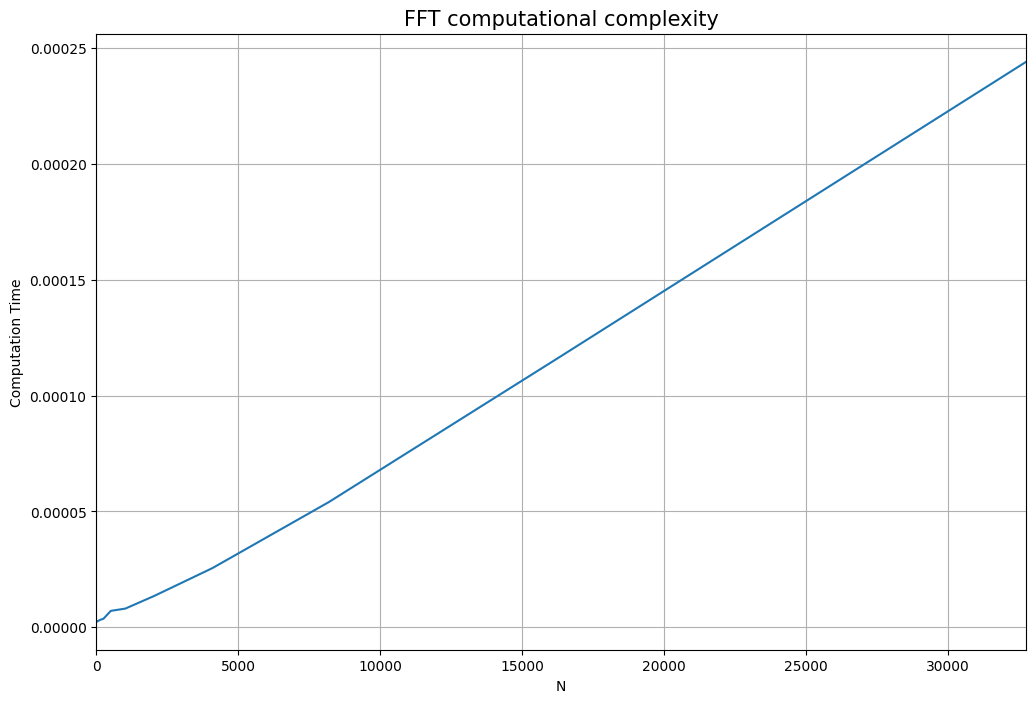

In [127]:
""" Task 1  """
# a)
N_samples = 8
period = 2  # period of one full cycle of cos(pi*t) is t = 2

plotDiagrams(period, N_samples)
isParsevalValid, energy_time, energy_freq = ParsevalTheoremCheck(period, N_samples)

print(f"Parseval's Theorem is: {'Valid' if isParsevalValid else 'Invalid'}")
print(f"Energy in time domain: {energy_time:.3f}")
print(f"Energy in frequency domain: {energy_freq:.3f}")

# b)
calc_fft_computation_period(period=2, max_sampling_exponent=15)

#### Wnioski
1 a) Jak widać z wykonanych obliczeń dla spróbkowanego sygnału energia w dziedzinie czasu oraz energia w dziedzinie częstotliwości przyjmują przyblione wartości więc doświadczenie potwierdza Twierdzenie Parsevala.

1 b) Otrzymany wykres złożoności obliczeniowej FFT przypomina funkcję liniową, co jest zbliżone do teoretycznej złozonością FFT, która jest opisana funkcją quasi-liniową n * log2(n) (funkcja ta w swoim przebiegu jest bardzo zbliżona do funkcji liniowej)

---
### Zadanie 2

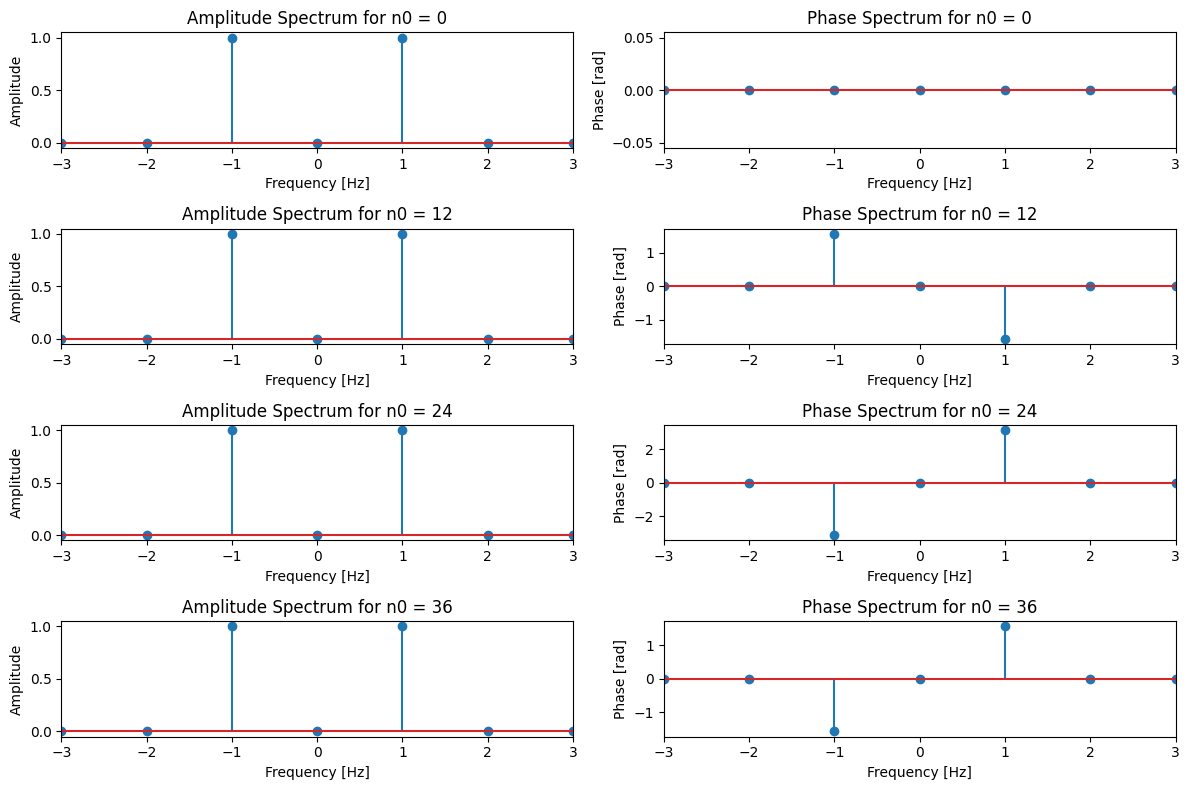

In [128]:
def plotSpectrumsSchifted(signal_wave, freq_linespace, n0_values, N):
    plt.figure(figsize=(12, 8))

    for i, n0 in enumerate(n0_values):
        signal_wave = A * np.cos(2 * np.pi * (n - n0) / N)
        _, magnitude_spectrum, phase_spectrum = getSpectrums(signal_wave, N)

        # Amplitude spectrum
        plt.subplot(len(n0_values), 2, 2 * i + 1)
        plt.stem(freq_linespace, magnitude_spectrum)
        plt.xlim(-3, 3)
        plt.title(f'Amplitude Spectrum for n0 = {n0}')
        plt.xlabel('Frequency [Hz]')
        plt.ylabel('Amplitude')

        # Phase spectrum
        plt.subplot(len(n0_values), 2, 2 * i + 2)
        plt.stem(freq_linespace, phase_spectrum)
        plt.xlim(-3, 3)
        plt.title(f'Phase Spectrum for n0 = {n0}')
        plt.xlabel('Frequency [Hz]')
        plt.ylabel('Phase [rad]')

    plt.tight_layout()
    plt.show()


if __name__ == '__main__':
    A = 2
    N = 48
    n = np.arange(N)
    n0_values = [0, N//4, N//2, 3*N//4]

    freq_linespace = np.fft.fftfreq(N, 1/N)

    plotSpectrumsSchifted(n, freq_linespace, n0_values, N)

#### Wnioski
Przesunięcie sygnału w czasie powoduje obrót fazy o wartość proporcjonalną do częstotliwości. Widmo amplitudowe pozostaje niezmienne dla różnych przesunięć n0, co potwierdza, że przesunięcie w czasie nie wpływa na rozkład energii w widmie.

---
### Zadanie 3

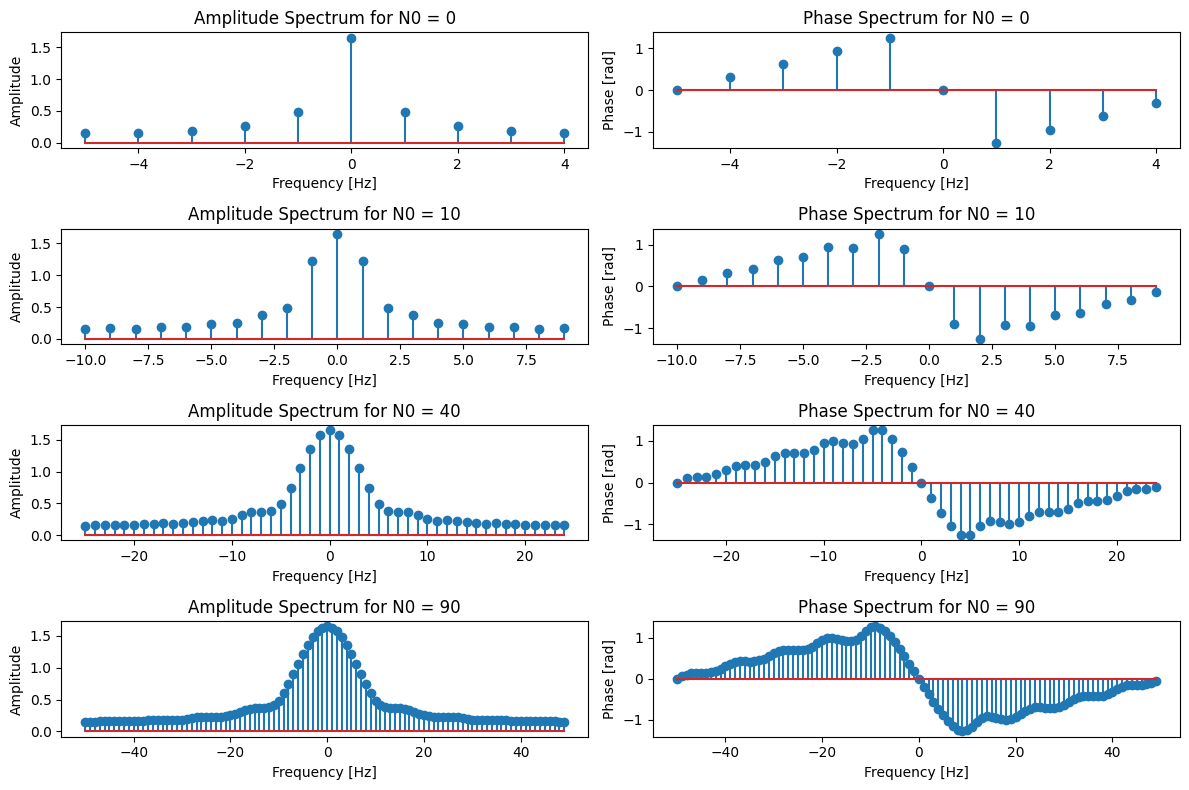

In [129]:
def addZeros(signal_wave, N0, N):
    signal_with_zeros = np.concatenate((signal_wave, np.zeros(N0)))

    freq_padded = np.fft.fftfreq(len(signal_with_zeros), 1/len(signal_with_zeros))
    _, magnitude_spectrum, phase_spectrum = getSpectrums(signal_with_zeros, N)

    return freq_padded, magnitude_spectrum, phase_spectrum


def plotSpectrumsWithZeros(signal_wave, N0_values, N):
    plt.figure(figsize=(12, 8))

    for i, N0 in enumerate(N0_values):
        freq_padded, magnitude_spectrum, phase_spectrum = addZeros(signal_wave, N0, N)

        # Amplitude spectrum
        plt.subplot(len(N0_values), 2, 2 * i + 1)
        plt.stem(freq_padded, magnitude_spectrum)
        plt.title(f'Amplitude Spectrum for N0 = {N0}')
        plt.xlabel('Frequency [Hz]')
        plt.ylabel('Amplitude')

        # Phase spectrum
        plt.subplot(len(N0_values), 2, 2 * i + 2)
        plt.stem(freq_padded, phase_spectrum)
        plt.title(f'Phase Spectrum for N0 = {N0}')
        plt.xlabel('Frequency [Hz]')
        plt.ylabel('Phase [rad]')

    plt.tight_layout()
    plt.show()


if __name__ == '__main__':
    A = 3
    N = 10
    n = np.arange(N)
    signal_wave = A * (1 - (n % N) / N)
    N0_values = [0, 1*N, 4*N, 9*N]

    plotSpectrumsWithZeros(signal_wave, N0_values, N)


#### Wnioski
Dopełnienie zerami wydłuża sygnał, co skutkuje większą liczbą próbek w transformatcie Fouriera. Pozwala to na bardziej precyzyjne odwzorowanie kształtu widma amplitudowego i fazowego. Dodatkowo zwiększa się zakres analizowanych częstotliwości. Dodanie zer nie zmienia fizycznych właściwości sygnału, a jedynie zwiększa rozdzielczość jego widma.

---
### Zadanie 4

In [130]:
def getSignal(
    time_linespace,
    a1,
    f1,
    a2,
    f2,
    a3,
    f3,
):
    signal = (
        a1 * np.sin(2 * np.pi * f1 * time_linespace)
        + a2 * np.sin(2 * np.pi * f2 * time_linespace)
        + a3 * np.sin(2 * np.pi * f3 * time_linespace)
    )
    return signal


def plotPeridogram(signal, N_samples, sampling_freq):

    freq_linespace = np.fft.fftfreq(N_samples, 1 / sampling_freq)
    psd = np.abs(np.fft.fft(signal)) ** 2 / N_samples  # power spectral density

    plt.figure(figsize=(16, 8))

    plt.stem(psd)
    plt.plot(freq_linespace[: N_samples // 2], psd[: N_samples // 2])
    # plt.plot(freq_linespace, psd)
    plt.title(f"PSD of {N_samples} times sampled signal")
    plt.xlabel("Frequencies")
    plt.ylabel("PSD")

    plt.show()

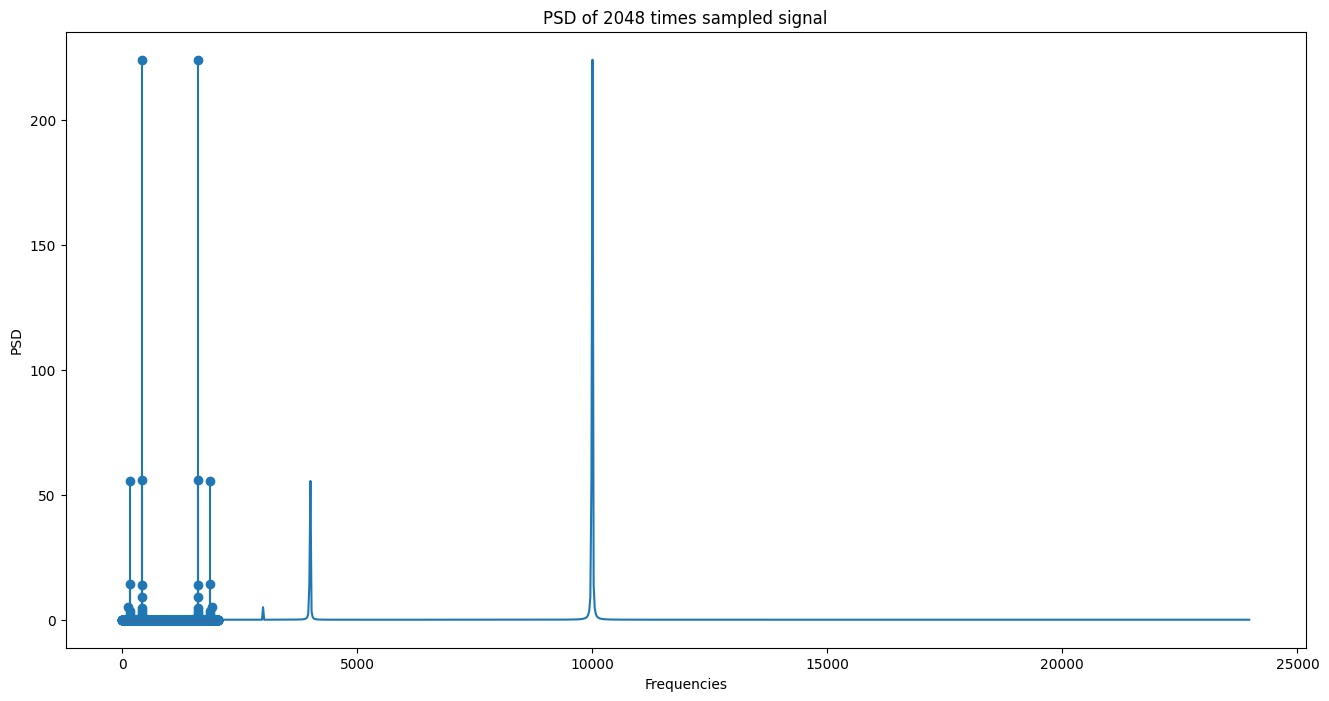

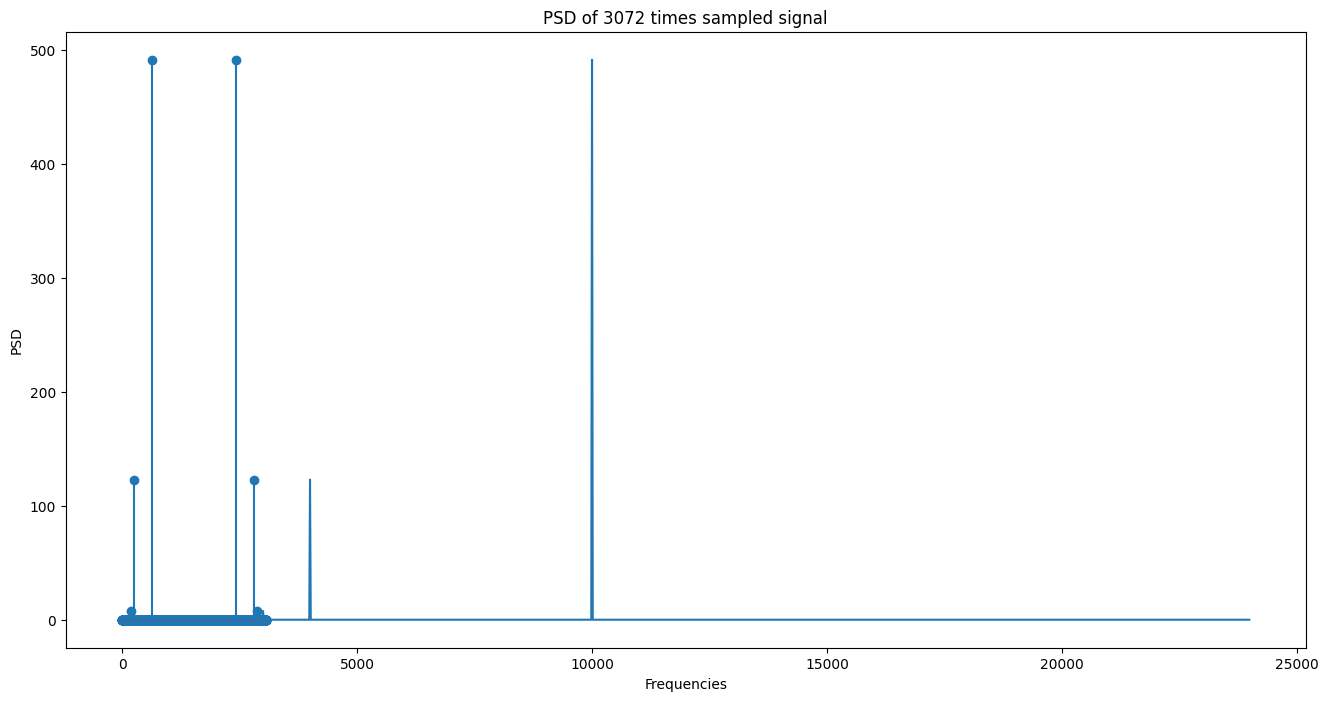

In [131]:
# data
A1 = 0.1
f1 = 3000
A2 = 0.4
f2 = 4000
A3 = 0.8
f3 = 10000

sampling_freq = 48000


""" For N1 = 2048 samples """

N_samples = 2048
time_linespace = np.arange(N_samples) / sampling_freq   # time = N_samples / sampling_freq -> time needed to get 2048 samples


signal = getSignal(
    time_linespace,
    A1,
    f1,
    A2,
    f2,
    A3,
    f3,
)
plotPeridogram(signal, N_samples, sampling_freq)


""" For N2 = 3/2 * N1 samples """

N2_samples = int(3/2 * N_samples)
time_linespace = np.arange(N2_samples) / sampling_freq

signal = getSignal(
    time_linespace,
    A1,
    f1,
    A2,
    f2,
    A3,
    f3,
)
plotPeridogram(signal, N2_samples, sampling_freq)


#### Wnioski
NWD częstotliwości składowych f1 = 3 kHz, f2 = 4 kHz, f3 = 10 kHz wynosi f = 1kHz a częstotliwość próbkowania wynosi fs = 48 kHz
Oznacza to, ze sygnał będzie się powtarzał co 48 próbek

Dla podanej liczby próbek N1 = 2048 mamy do czynienia ze zjawiskiem przecieku widma (co widać jako wiele zaznaczonych punktów w otoczeniu pewnych częstotliowści na pierwszym wykresie). Dochodzi do niego gdyz 2048 nie jest podzielne całkowicie przez 48, a więc próbek jest za mało, żeby operacja transformacji Fouriera trafiła w właściwą częstotliwość - zamiast tego trafia w kilka bliskich wartości co widać jako kilka kropek w obrębie jednego słupka na wykresie (po przybliżeniu widać, że jest to kilka słupków - częstotliwości - blisko siebie)

Dla liczby próbek N2 = 3/2 * N1 = 3072 nie mamy do czynienia ze zjawiskiem przecieku widma, gdyz 3072 jest podzielne całkowicie przez 48, czyli sygnał jest wystarczająco dobrze spróbkowany